<a href="https://colab.research.google.com/github/YashJadhav16/Python/blob/Python/SellingPriceofusedcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                          Brand  Year    Fuel Transmission   Engine  \
0        Maruti Swift Dzire VDI  2014  Diesel       Manual  1248 CC   
1  Skoda Rapid 1.5 TDI Ambition  2014  Diesel       Manual  1498 CC   
2      Honda City 2017-2020 EXi  2006  Petrol       Manual  1497 CC   
3     Hyundai i20 Sportz Diesel  2010  Diesel       Manual  1396 CC   
4        Maruti Swift VXI BSIII  2007  Petrol       Manual  1298 CC   

    Max_Power                    Torque  Seats     Mileage  KM_Driven  \
0      74 bhp            190Nm@ 2000rpm    5.0   23.4 kmpl     145500   
1  103.52 bhp       250Nm@ 1500-2500rpm    5.0  21.14 kmpl     120000   
2      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0   17.7 kmpl     140000   
3      90 bhp  22.4 kgm at 1750-2750rpm    5.0   23.0 kmpl     127000   
4    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0   16.1 kmpl     120000   

          Owner Seller_Type  Selling_Price  
0   First Owner  Individual         450000  
1  Second Owner  Individual         370000  

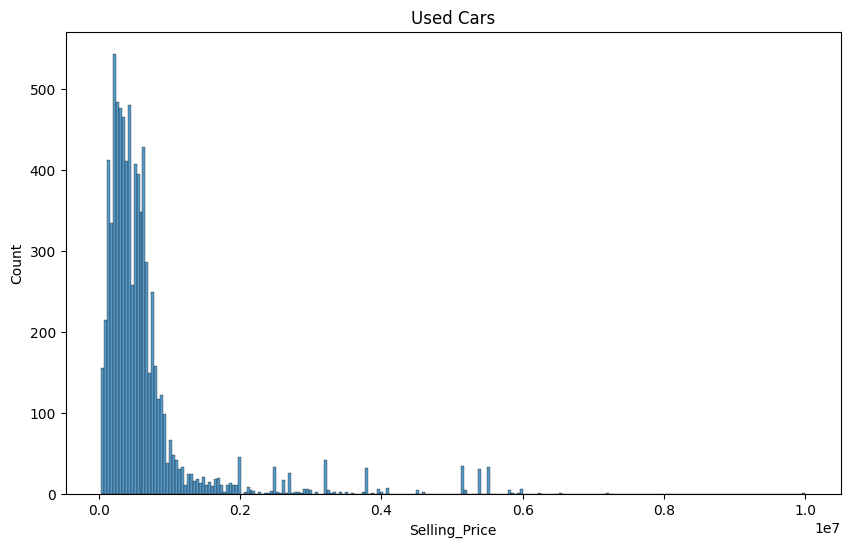

Predicted Selling Price of Cars
795905.797062993
458887.0096409619
586800.2871130407
998368.3061738312
481030.3457712829
1019773.5310997963
-71257.87727734447
1025678.4207345545
801810.6866977215
578201.9887028039
458887.0096409619
1017559.1974867582
5764.724016368389
-6045.055253148079
990249.0829260349
265760.9101446867
1005011.3070129156
907839.6640813947
361871.14916437864
-238511.08770018816
673159.2980213165
478556.97611635923
660611.4075474441
466268.1216844022
1005749.4182172716
822477.8004193604
1094801.8379009962
196896.52902013063
820636.9510757327
578201.9887028039
1168353.922293514
843883.0253453553
257162.61173444986
991725.305334717
638468.0714171231
846097.3589583933
383858.702839762
398620.92692664266
885696.3279510736
504390.86826840043
641161.4801926017
376477.59079632163
922601.8881682754
466268.1216844022
578201.9887028039
932197.3338247538
381298.933183074
903196.9446060658
1025678.4207345545
713496.378218323
333532.7637143433
929983.0002117157
-35569.50342690945


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Selling%20Price.csv')
print(data.head())
data.info()
data.describe()
data = data.dropna()
#data['dateCrawled'] = pd.to_datetime(data['dateCrawled'])
#data['dateCreated'] = pd.to_datetime(data['dateCreated'])
columns_to_drop =  ['Max_Power', 'Seller_Type', 'Seats','Brand']
data = data.drop(columns=columns_to_drop)
#y=data['Selling_Price']
#x=data[['Year']]

plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'])
plt.xlabel('Selling_Price')
plt.ylabel('Count')
plt.title('Used Cars')
plt.show()
y=data['Selling_Price']
x=data[['Year','Transmission','KM_Driven']]
ohe = OneHotEncoder()
transformed = ohe.fit_transform(x[['Transmission']])
x = x.drop('Transmission', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Predicted Selling Price of Cars")
for Selling_Price in y_pred:
  print(Selling_Price)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")